# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


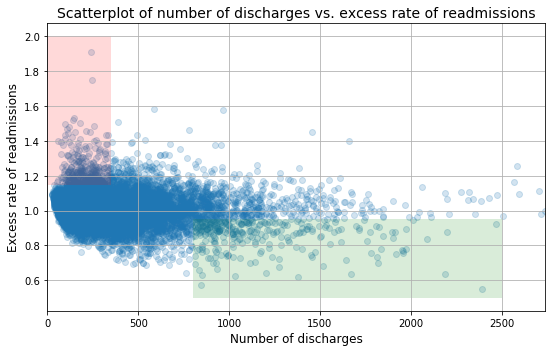

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [9]:
# Your Turn
hospital_read_df.shape

(16860, 12)

In [28]:
clean_hospital = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0]
clean_hospital.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


### Work.

** A. Do you agree with the above analysis and recommendations? Why or why not? **

In [21]:
corr_val = np.corrcoef(clean_hospital['Number of Discharges'],clean_hospital['Excess Readmission Ratio'])
corr_val

array([[ 1.        , -0.09739794],
       [-0.09739794,  1.        ]])

In [24]:
corr_val[1,0]

-0.097397943510793533

### Answer

The corelation between the 2 variables used in above analysis is negatively related but not very much as the value more close to 0 than 1

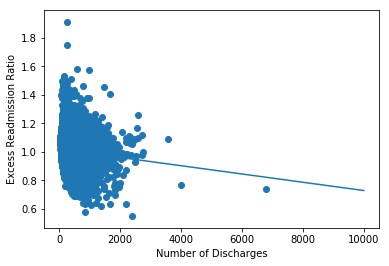

In [27]:
plt.scatter(clean_hospital['Number of Discharges'],clean_hospital['Excess Readmission Ratio'])
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
a,b = np.polyfit(clean_hospital['Number of Discharges'],clean_hospital['Excess Readmission Ratio'],1)
x = np.array([0,10000])
y = a*x + b
plt.plot(x,y)
plt.show()

From linear chart also it shows the above variables are only slightly negatively related to each other.

Let see if there is any relationship of any other variables with **"Excess Readmission Ratio"**

In [30]:
corr_readmission = np.corrcoef(clean_hospital['Number of Readmissions'],clean_hospital['Excess Readmission Ratio'])
corr_readmission[0,1]

0.11759983412898264

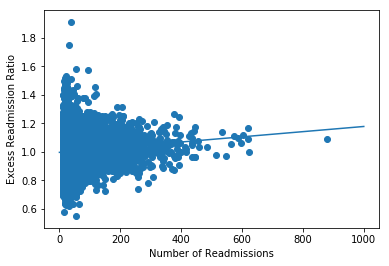

In [32]:
plt.scatter(clean_hospital['Number of Readmissions'],clean_hospital['Excess Readmission Ratio'])
plt.xlabel('Number of Readmissions')
plt.ylabel('Excess Readmission Ratio')
a,b = np.polyfit(clean_hospital['Number of Readmissions'],clean_hospital['Excess Readmission Ratio'],1)
x = np.array([0,1000])
y = a*x + b
plt.plot(x,y)
plt.show()

As we can see **"Number of Readmission"** is positively related to **"Excess Readmission Ration"** but only slightly.

In [33]:
corr_disch_read = np.corrcoef(clean_hospital['Number of Readmissions'],clean_hospital['Number of Discharges'])
corr_disch_read[0,1]

0.79127240870404059

In [39]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

In [49]:
x = clean_hospital['Number of Discharges']
y = clean_hospital['Excess Readmission Ratio']

inds = np.arange(len(clean_hospital['Number of Readmissions']))
a = np.empty(12000)
b = np.empty(12000)
for i in range(12000):
    bs_inds = np.random.choice(inds, size=len(inds))
    bs_x, bs_y = x[bs_inds], y[bs_inds]
    a[i], b[i] = np.polyfit(bs_x,bs_y,1)
a    

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rchauh

KeyboardInterrupt: 